In [3]:
from set_rcParams import set_rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
set_rcParams()

def phi(x):
  return x * (1 - x)
data_path = "../elements_variation_study"

particles_per_element = [1, 10, 100, 1000]


pot_l2_errors = []
pot_linf_errors = []

density_l2_errors = []
density_linf_errors = []

x_vals = []
num_seeds = 20
for i in range(num_seeds):
  curr_dir = f"/run_{i:d}"
  pot_l2_error =[]
  pot_linf_error =[]


  density_l2_error = []
  density_linf_error = []
  for n in particles_per_element:
    temp_path = data_path + curr_dir + f"/{n:d}_elems_potential_0001.csv"
    data = pd.read_csv(temp_path)
    potential = data["phi"]
    x = data["x"]
    pot_l2_error.append(np.linalg.norm(potential -  phi(x)) / np.linalg.norm( phi(x)))
    pot_linf_error.append(np.linalg.norm(potential -  phi(x), np.inf))

    temp_path = data_path + curr_dir + f"/{n:d}_elems_density_0001.csv"
    data = pd.read_csv(temp_path)
    density = data["n"]
    true_vals = 2 * np.ones(x.shape)
    density_l2_error.append(np.linalg.norm(density -true_vals) / np.linalg.norm( true_vals))
    density_linf_error.append(np.linalg.norm(density - true_vals, np.inf))

  pot_l2_errors.append(np.array(pot_l2_error))
  pot_linf_errors.append(np.array(pot_linf_error))
  density_l2_errors.append(np.array(density_l2_error))
  density_linf_errors.append(np.array(density_linf_error))
  x_vals.append(particles_per_element)

pot_l2_std = np.array(pot_l2_errors).std(axis=0)
pot_linf_std = np.array(pot_linf_errors).std(axis=0)

density_l2_std = np.array(density_l2_errors).std(axis=0)
density_linf_std = np.array(density_linf_errors).std(axis=0)


pot_l2_errors = np.array(pot_l2_errors).reshape(-1)
pot_linf_errors = np.array(pot_linf_errors).reshape(-1)
density_l2_errors = np.array(density_l2_errors).reshape(-1)
density_linf_errors = np.array(density_linf_errors).reshape(-1)
x_vals = np.array(x_vals).reshape(-1)

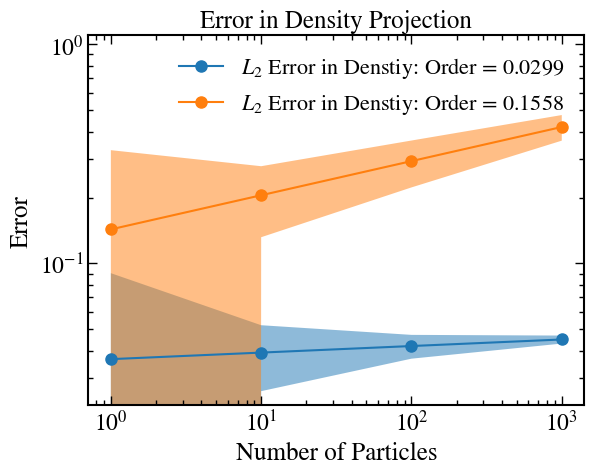

In [4]:

density_l2_model = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(density_l2_errors)))
density_linf_model = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(density_linf_errors)))

density_l2_fit = np.exp(density_l2_model.predict(np.log(particles_per_element).reshape(-1, 1)))
density_linf_fit = np.exp(density_linf_model.predict(np.log(particles_per_element).reshape(-1, 1)))

plt.fill_between(particles_per_element, density_l2_fit - density_l2_std, density_l2_fit + density_l2_std, alpha=0.5)
plt.loglog(particles_per_element, density_l2_fit, '-o', label=f"$L_2$ Error in Denstiy: Order = {np.abs(density_l2_model.coef_[0]):0.4f}")

plt.fill_between(particles_per_element, density_linf_fit - density_linf_std, density_linf_fit + density_linf_std, alpha=0.5)
plt.loglog(particles_per_element, density_linf_fit, '-o', label=f"$L_2$ Error in Denstiy: Order = {np.abs(density_linf_model.coef_[0]):0.4f}")

plt.title("Error in Density Projection")
plt.ylabel("Error")
plt.xlabel("Number of Particles")
plt.legend()
plt.ylim(top=1.1)
plt.show()

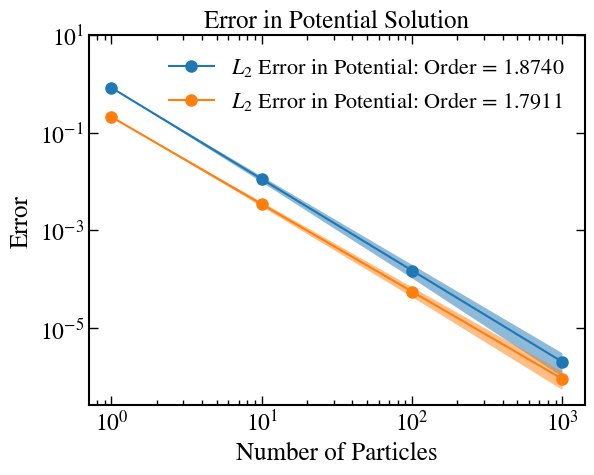

In [5]:

pot_l2_model = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(pot_l2_errors)))
pot_linf_model = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(pot_linf_errors)))

pot_l2_fit = np.exp(pot_l2_model.predict(np.log(particles_per_element).reshape(-1, 1)))
pot_linf_fit = np.exp(pot_linf_model.predict(np.log(particles_per_element).reshape(-1, 1)))

plt.fill_between(particles_per_element, pot_l2_fit - pot_l2_std, pot_l2_fit + pot_l2_std, alpha=0.5)
plt.loglog(particles_per_element, pot_l2_fit, '-o', label=f"$L_2$ Error in Potential: Order = {np.abs(pot_l2_model.coef_[0]):0.4f}")

plt.fill_between(particles_per_element, pot_linf_fit - pot_linf_std, pot_linf_fit + pot_linf_std, alpha=0.5)
plt.loglog(particles_per_element, pot_linf_fit, '-o', label=f"$L_2$ Error in Potential: Order = {np.abs(pot_linf_model.coef_[0]):0.4f}")

plt.title("Error in Potential Solution")
plt.ylabel("Error")
plt.xlabel("Number of Particles")
plt.legend()
plt.ylim(top=1e1)
plt.show()